# Exploratory Data Analysis 

## Description of the data


In [1]:
import pandas as pd
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

cities = ['chennai.csv', 'coimbatore.csv', 'madurai.csv', 'salem.csv', 'tirunelveli.csv']
input_folder = '../../data/processed/'

In [2]:
def load_data(file_name):
    """
    Loads wind speed data from a CSV file.
    """
    path = os.path.join(input_folder, file_name)
    df = pd.read_csv(path)
    df.columns = ['date_time', 'wind_speed']
    df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')
    df['wind_speed'] = df['wind_speed'].astype(float).round(2)
    df.dropna(subset=['date_time', 'wind_speed'], inplace=True)
    return df


In [3]:
for city in cities:
    df = load_data(city)
    print(f"\n📊 Summary for {city}:")
    print(df['wind_speed'].describe().round(2))




📊 Summary for chennai.csv:
count    336744.00
mean          6.30
std           2.31
min           0.02
25%           4.81
50%           6.55
75%           7.82
max          18.10
Name: wind_speed, dtype: float64

📊 Summary for coimbatore.csv:
count    336744.00
mean          4.70
std           2.17
min           0.01
25%           3.20
50%           4.55
75%           5.98
max          15.50
Name: wind_speed, dtype: float64

📊 Summary for madurai.csv:
count    336744.00
mean          4.53
std           1.90
min           0.01
25%           3.22
50%           4.51
75%           5.76
max          14.56
Name: wind_speed, dtype: float64

📊 Summary for salem.csv:
count    336744.00
mean          4.74
std           2.09
min           0.00
25%           3.26
50%           4.62
75%           6.02
max          15.00
Name: wind_speed, dtype: float64

📊 Summary for tirunelveli.csv:
count    336744.00
mean          5.61
std           2.30
min           0.03
25%           4.00
50%           5.61
7

## Plotting the data for visualization 

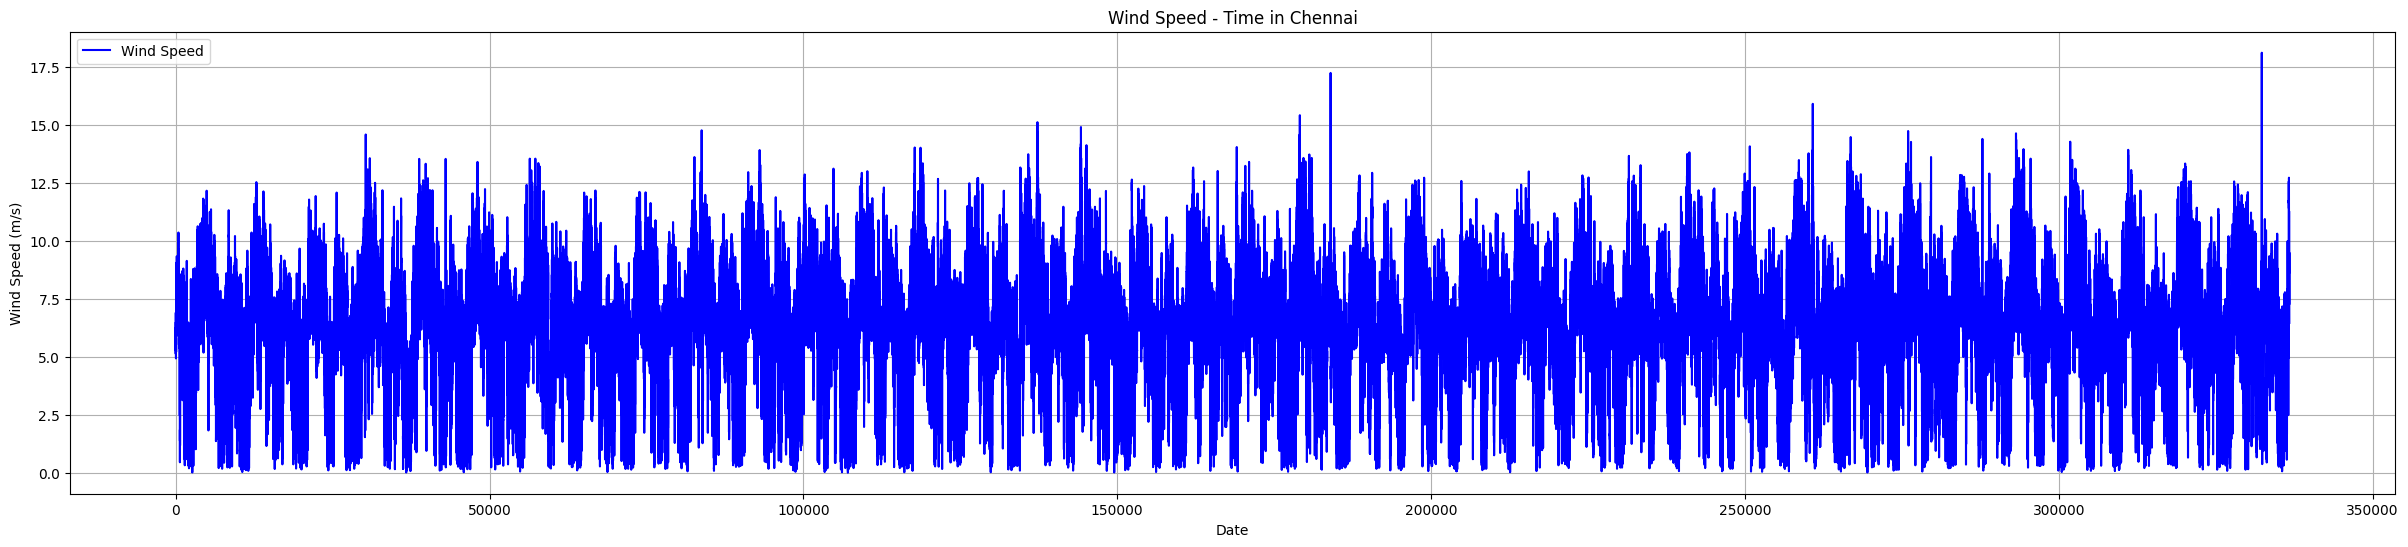

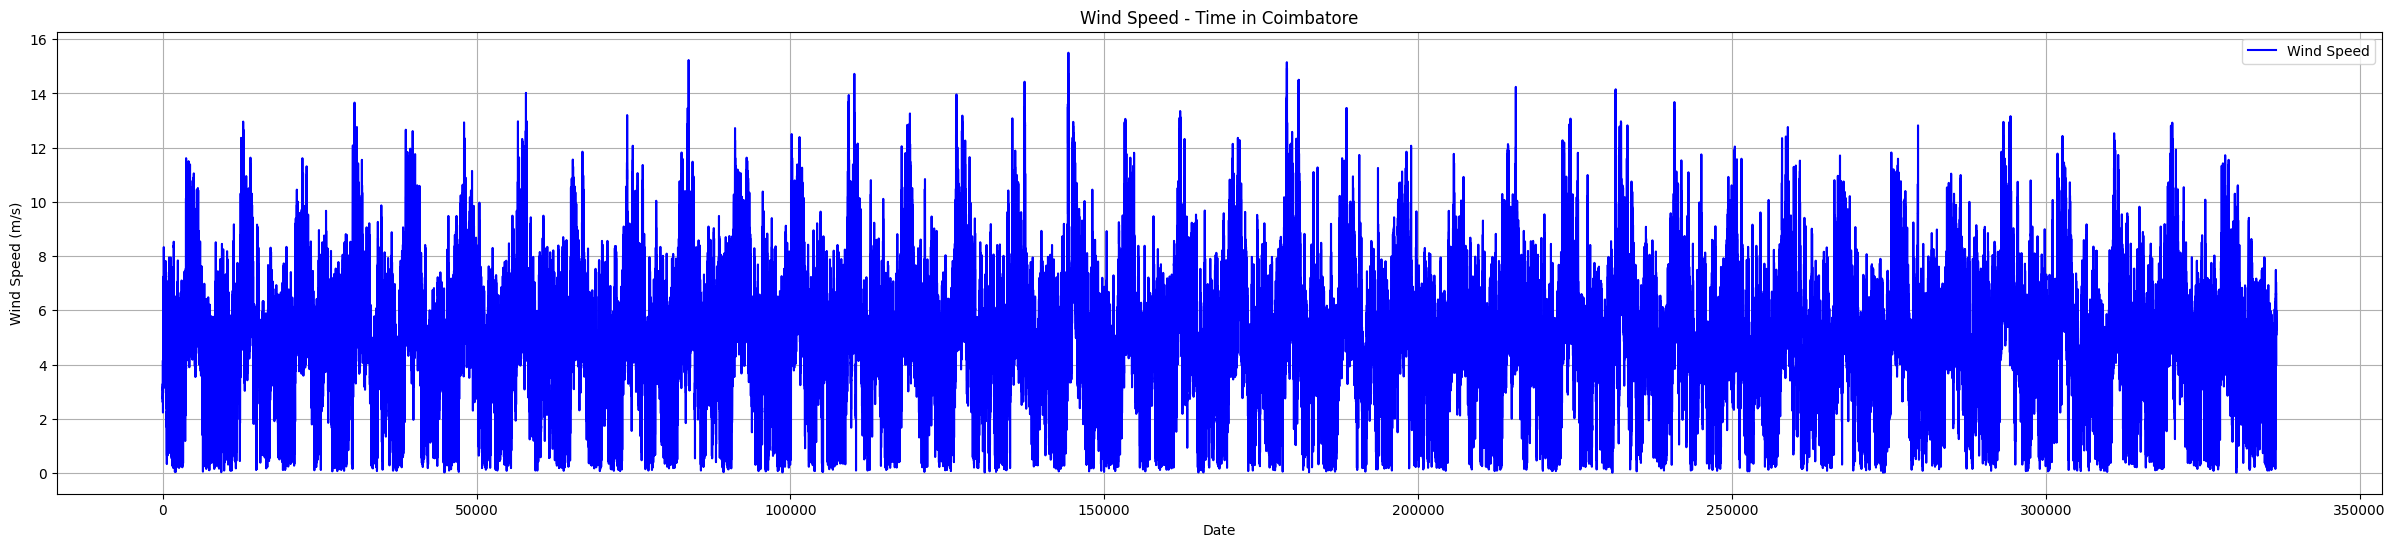

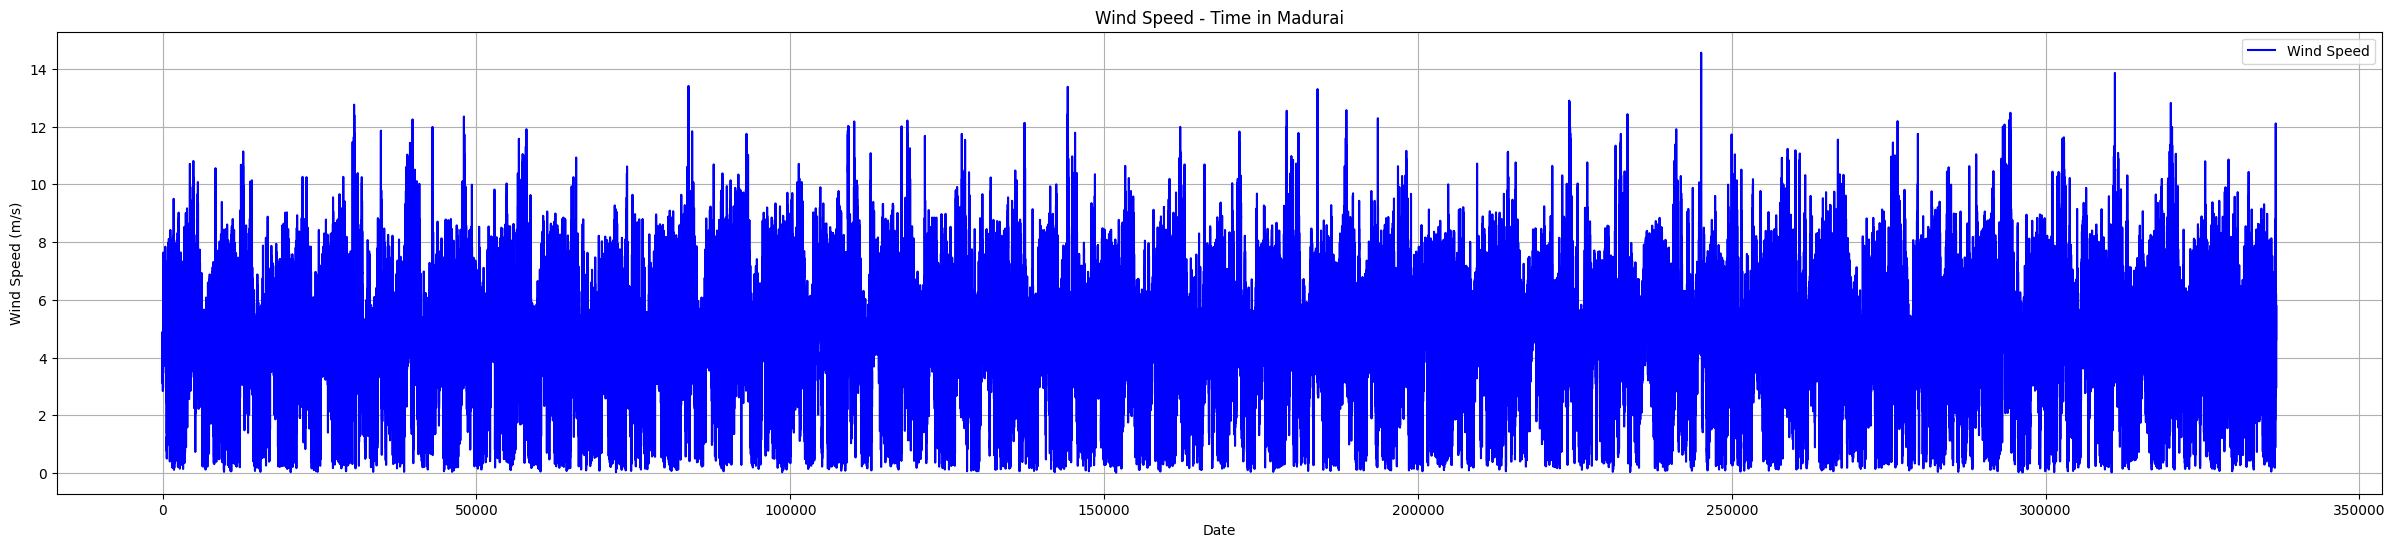

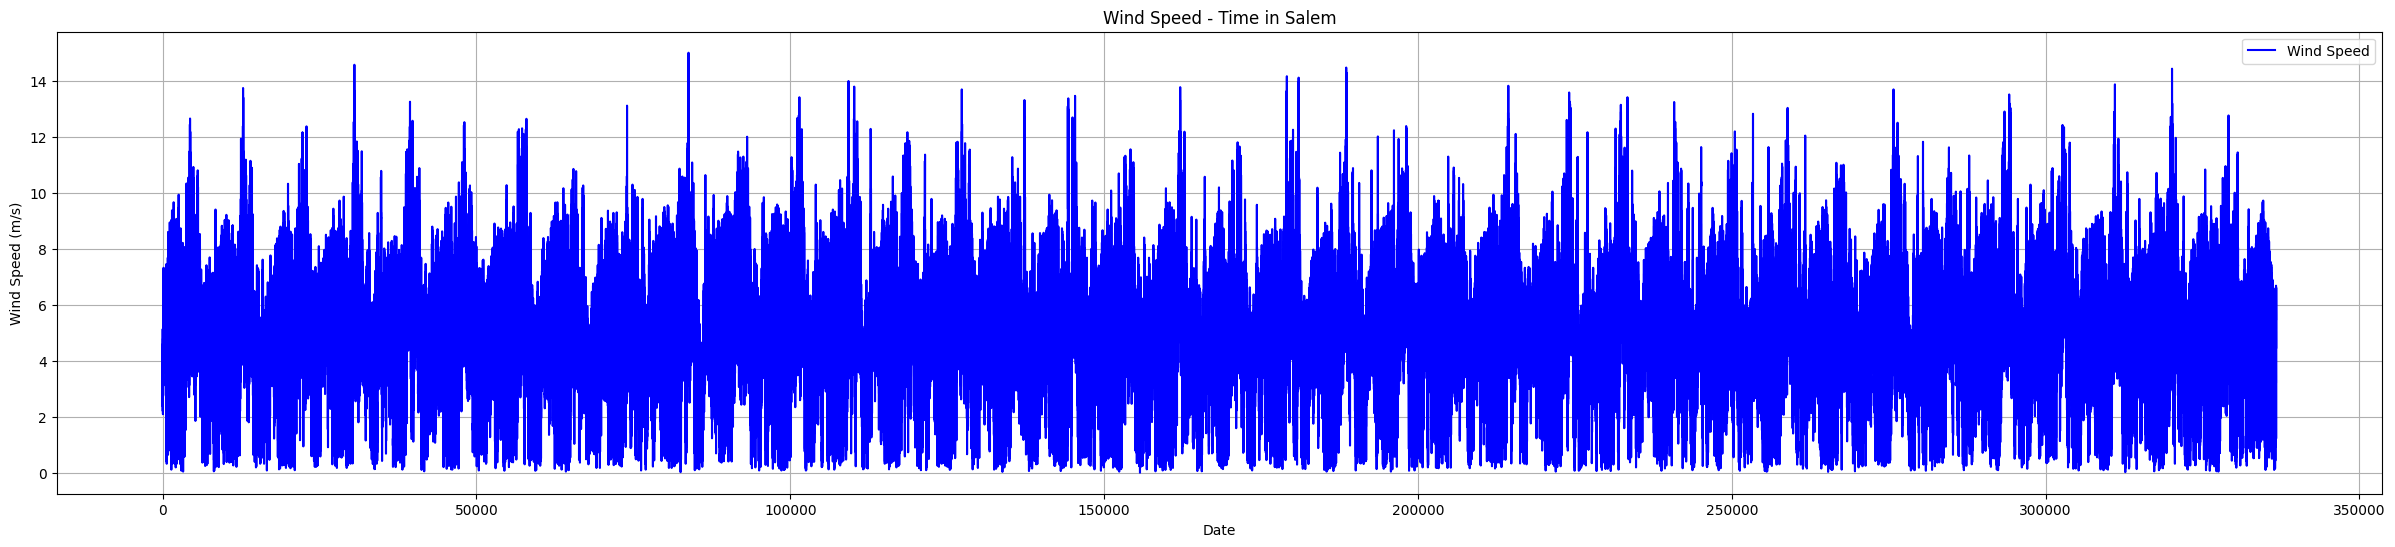

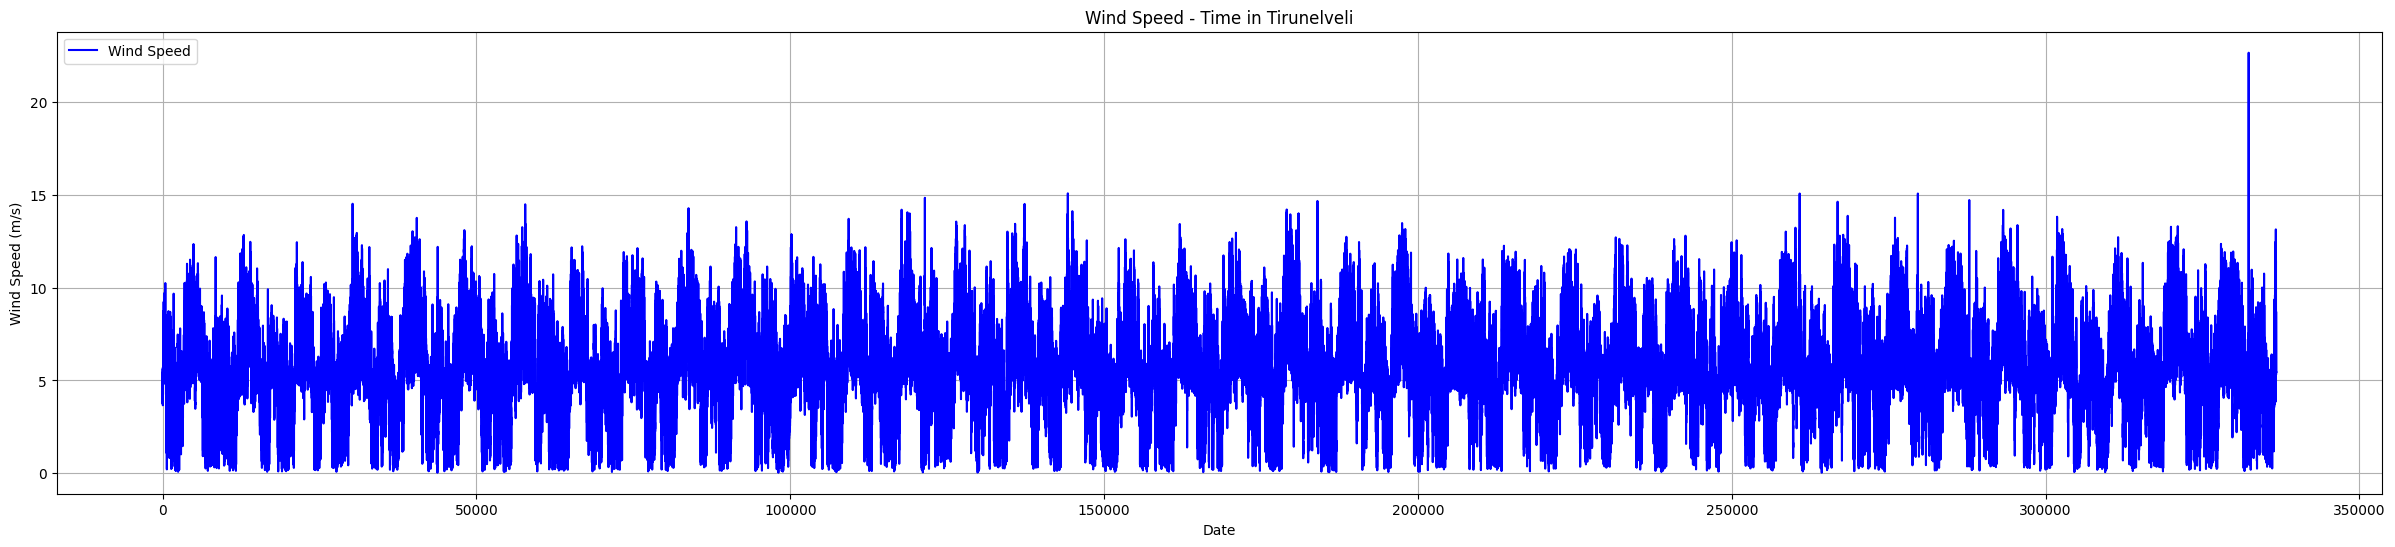

In [4]:
for city in cities:
    df = load_data(city)
    plt.figure(figsize=(30, 6))
    plt.plot(df.index, df['wind_speed'], label='Wind Speed', color='blue')
    plt.title(f'Wind Speed - Time in {city.split(".")[0].capitalize()}')
    plt.xlabel('Date')
    plt.ylabel('Wind Speed (m/s)')
    plt.legend()
    plt.grid()
    plt.show()

## Seasonal Plotting

### 1. Yearly plot 

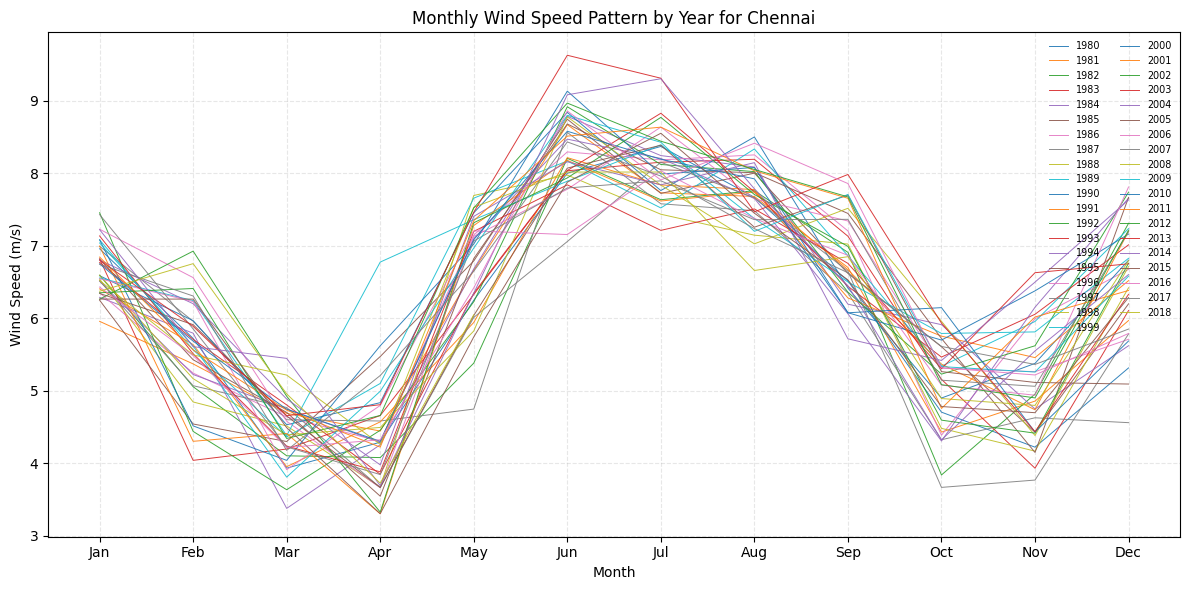

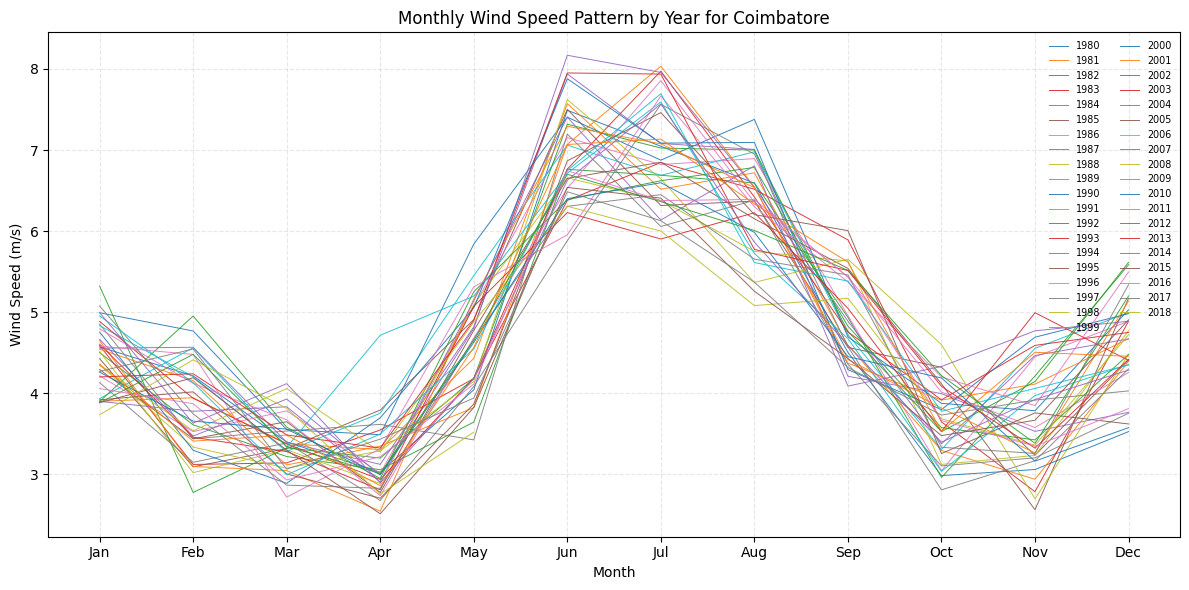

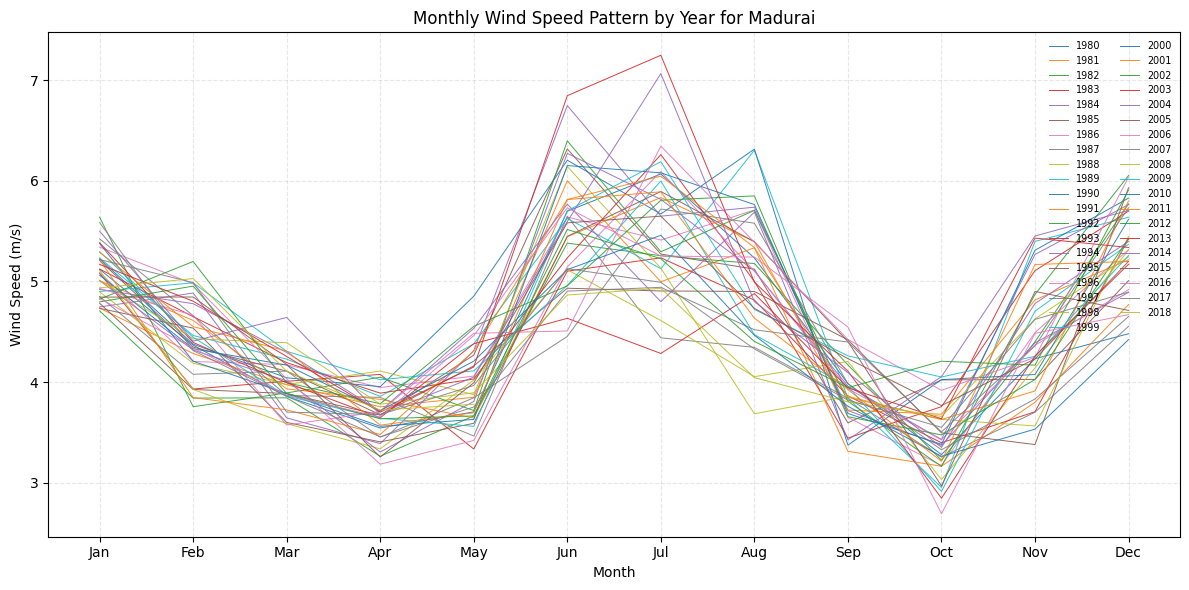

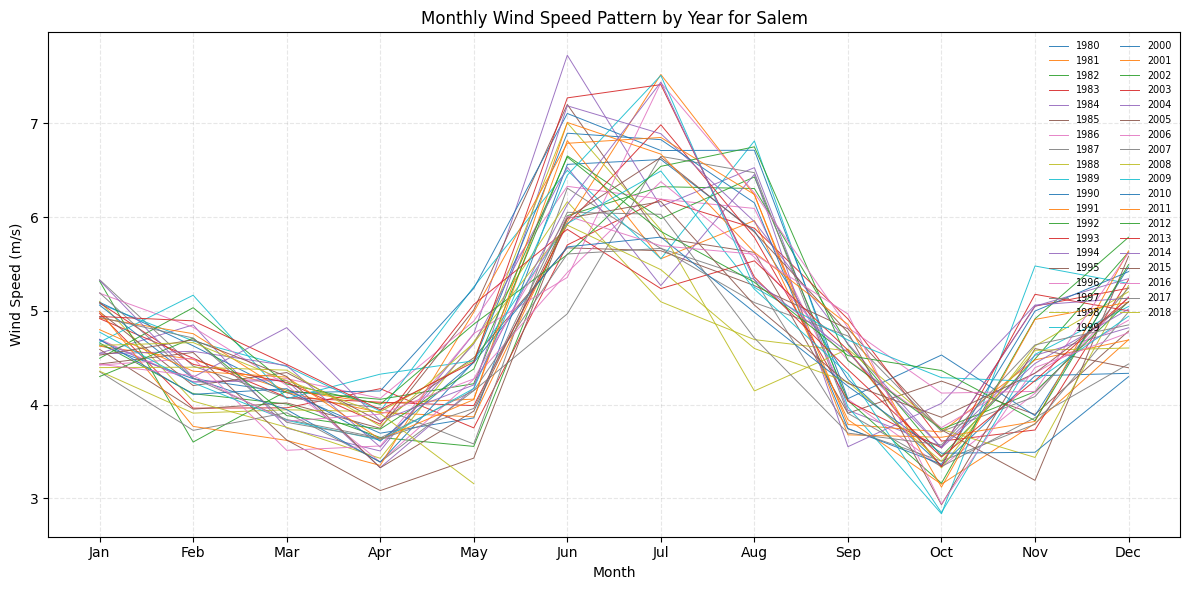

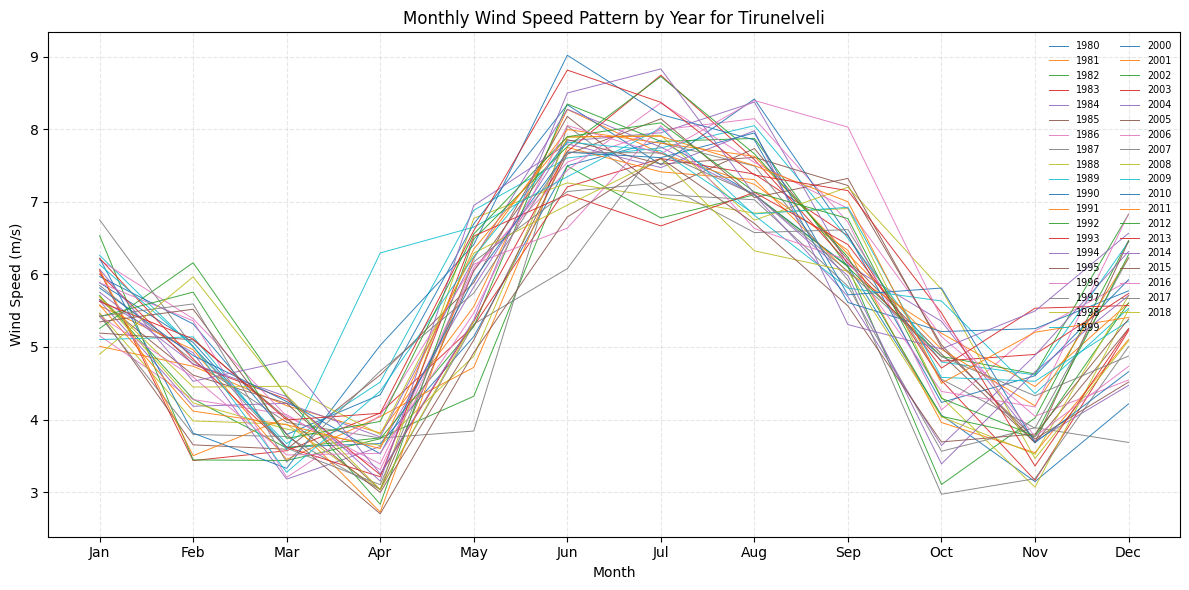

In [7]:
for city in cities:
    df = load_data(city)
    df['year'] = df['date_time'].dt.year    
    df['month'] = df['date_time'].dt.month  
    plt.figure(figsize=(12, 6))

    #Plot yearly wind speed with month averages
    years = df['year'].unique()
    for year in years:
        monthly_avg = df[df['year'] == year].groupby('month')['wind_speed'].mean()
        plt.plot(monthly_avg.index, monthly_avg.values, label=str(year), linewidth=0.7, alpha=0.9)
 
    plt.title(f"Monthly Wind Speed Pattern by Year for {city.split('.')[0].capitalize()}")
    plt.xlabel('Month')
    plt.ylabel('Wind Speed (m/s)')
    plt.xticks(ticks=range(1,13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend(loc='upper right', fontsize='x-small', ncol=2, frameon=False)
    plt.tight_layout()
    plt.show()



### 2. Weekly plot

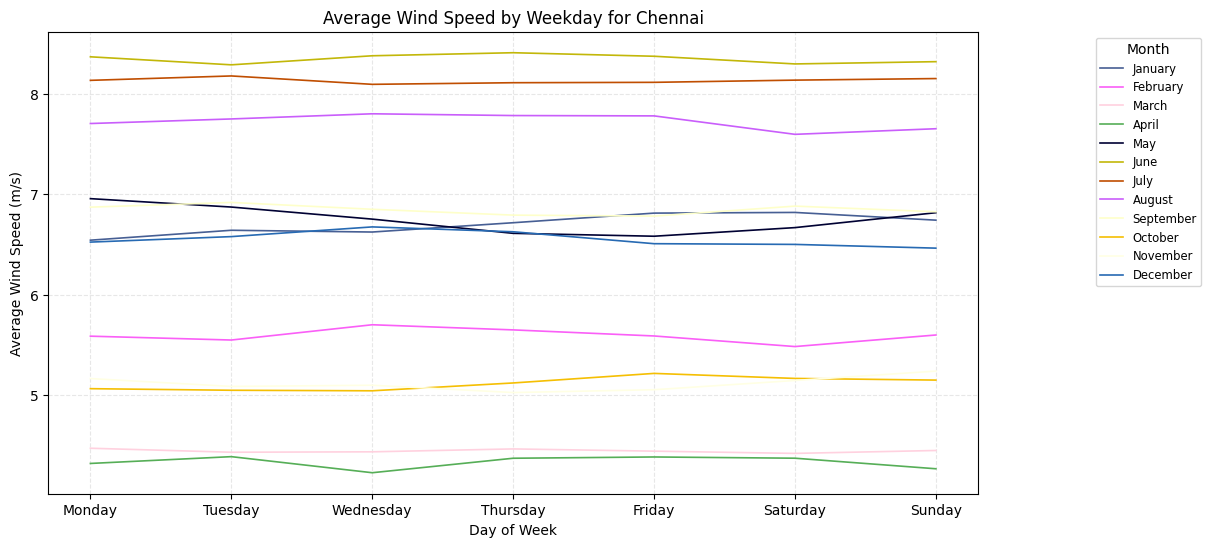

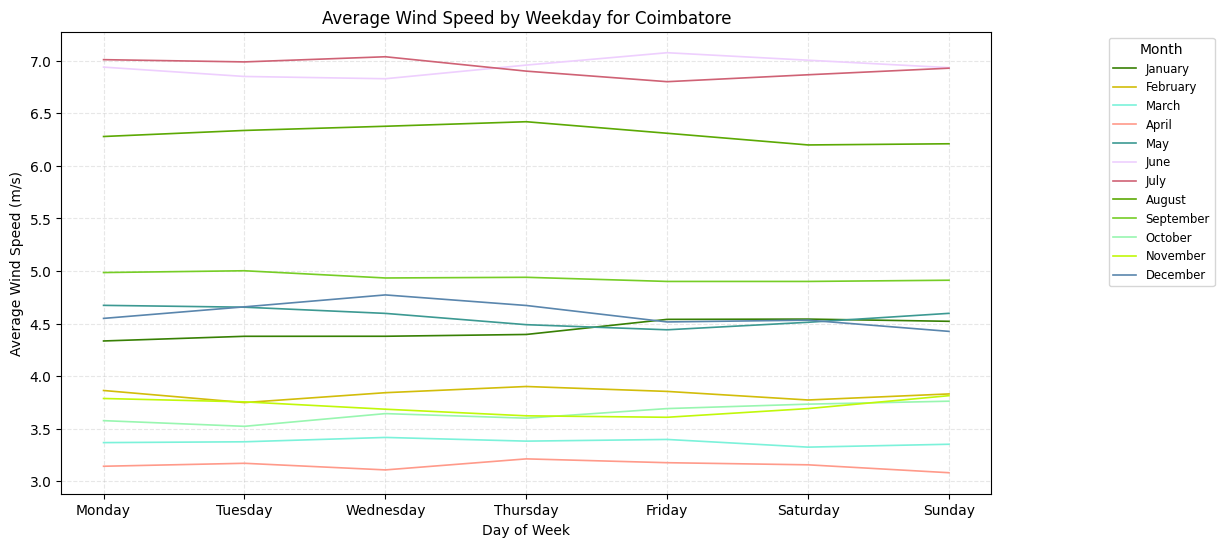

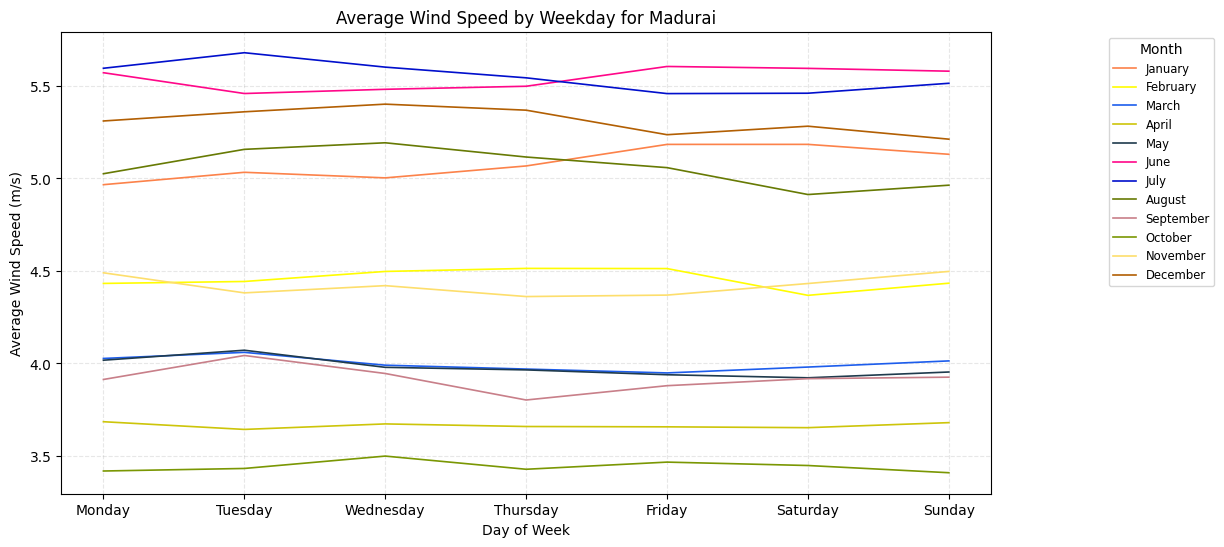

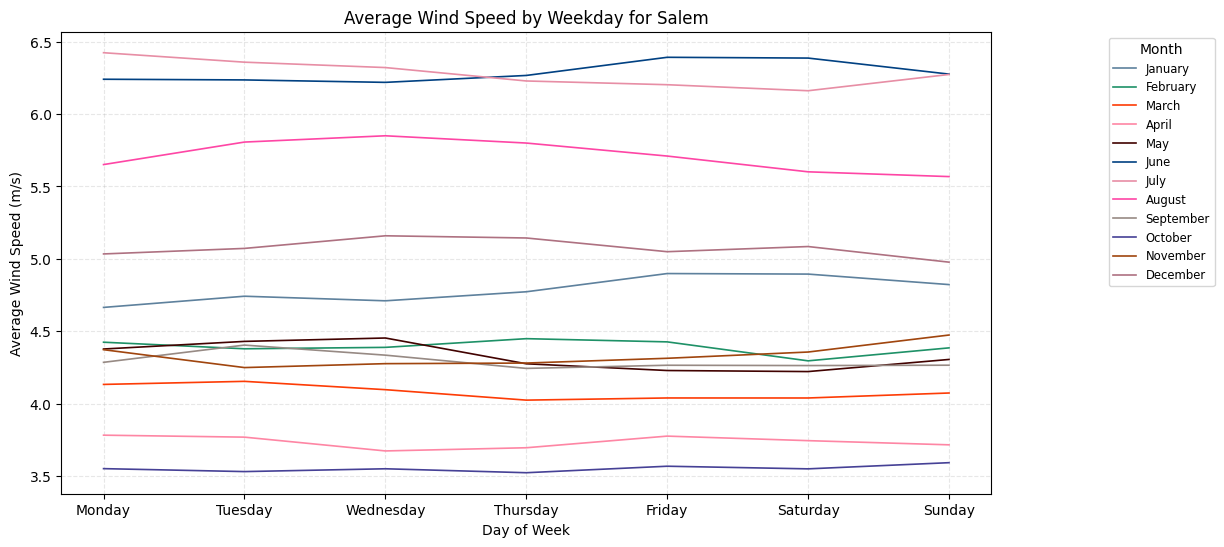

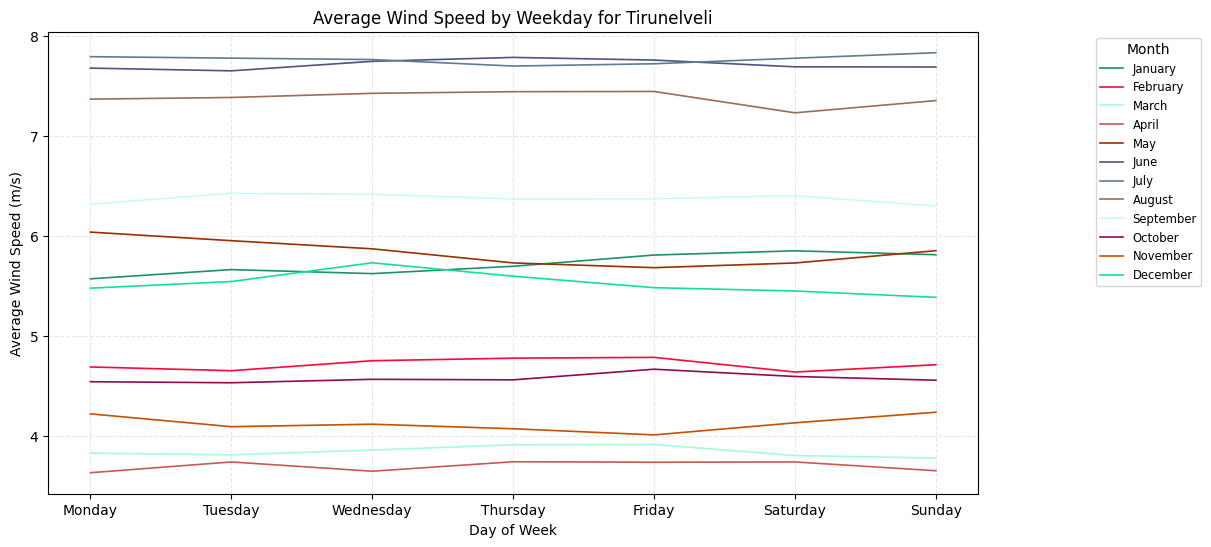

In [9]:
for city in cities:
    df = load_data(city)
    df['weekday'] = df['date_time'].dt.day_name()     # Monday, Tuesday, etc.
    df['month'] = df['date_time'].dt.month_name()     # January, February, etc.

    # Group and aggregate
    grouped = df.groupby(['month', 'weekday'])['wind_speed'].mean().reset_index()

    # Ensure weekday order
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # Pivot the grouped data for plotting
    df_plot = grouped.pivot(index='weekday', columns='month', values='wind_speed').reindex(weekday_order)

    # Assign unique color to each month
    calendar_months = pd.date_range("2000-01-01", periods=12, freq='MS').strftime('%B')
    months = [m for m in calendar_months if m in df_plot.columns]

    colors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(months), replace=False)

    # Plot
    plt.figure(figsize=(12, 6))
    for month, color in zip(months, colors):
        plt.plot(df_plot.index, df_plot[month], label=month, linewidth=1.2, color=mpl.colors.XKCD_COLORS[color])

    plt.xlabel("Day of Week")
    plt.ylabel("Average Wind Speed (m/s)")
    plt.title(f"Average Wind Speed by Weekday for {city.split('.')[0].capitalize()}")
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend(title="Month", bbox_to_anchor=(1.12, 1), loc='upper left', fontsize='small')
    plt.show()



### 3. Daily plot

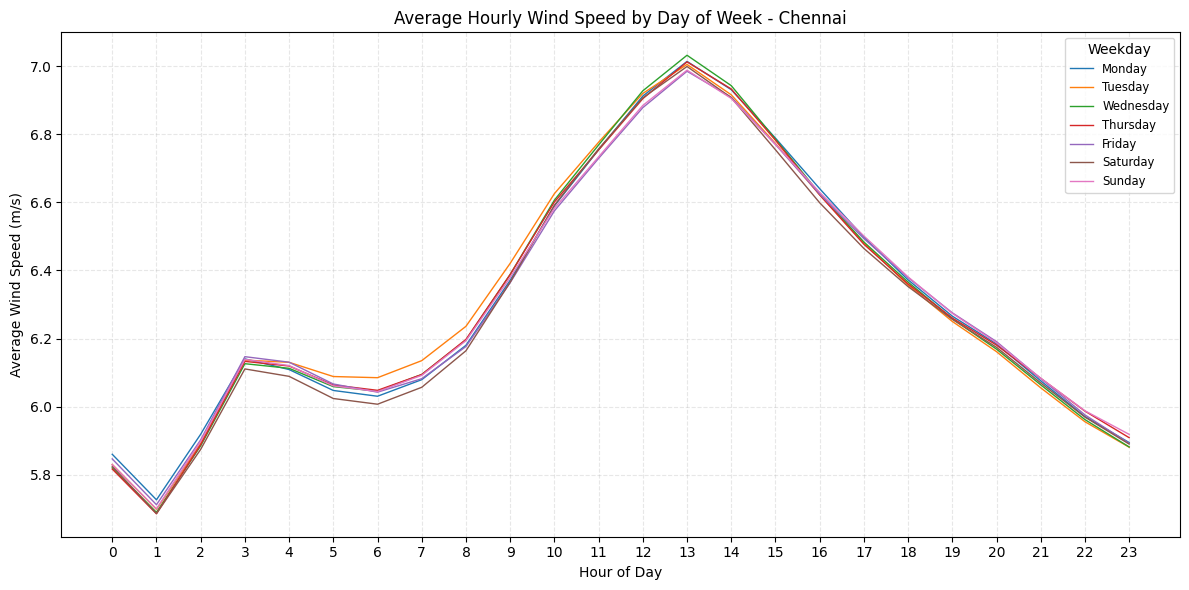

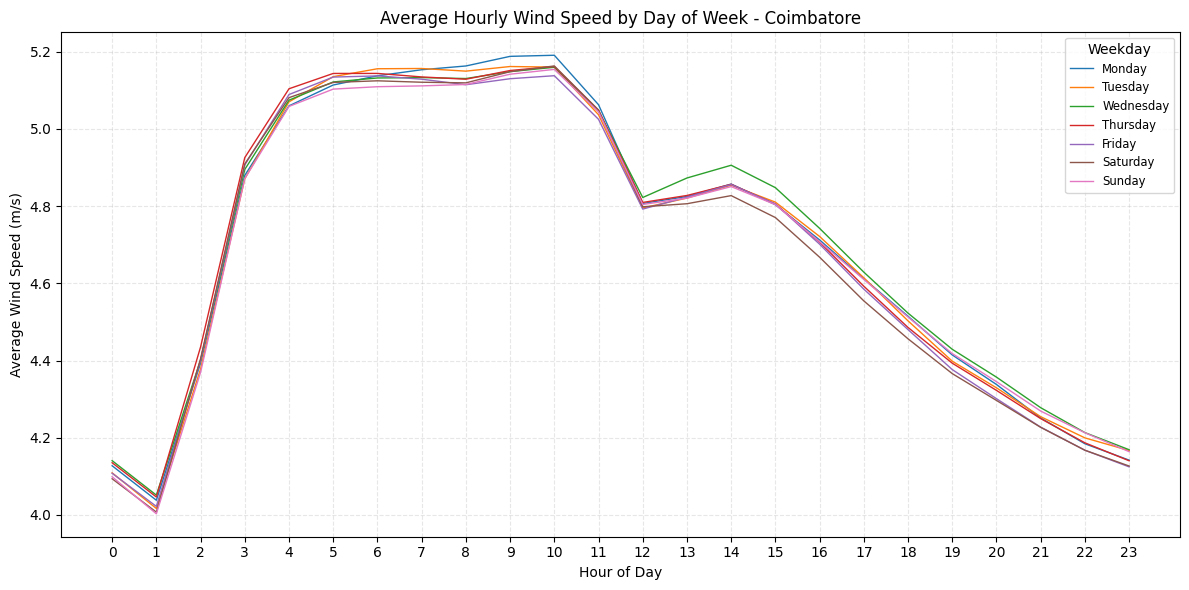

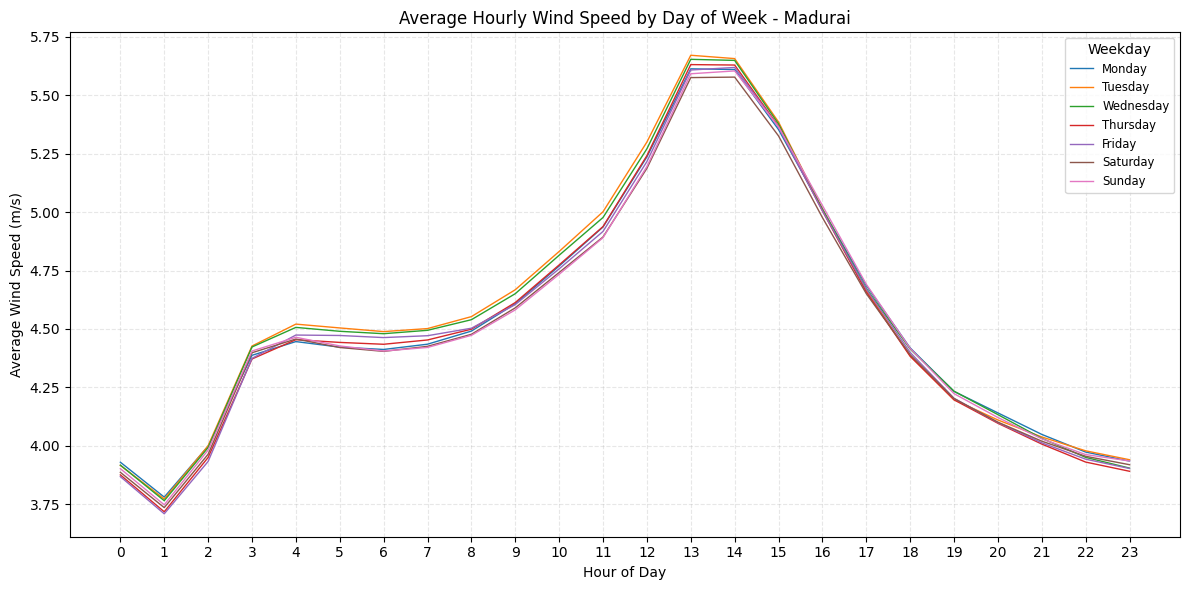

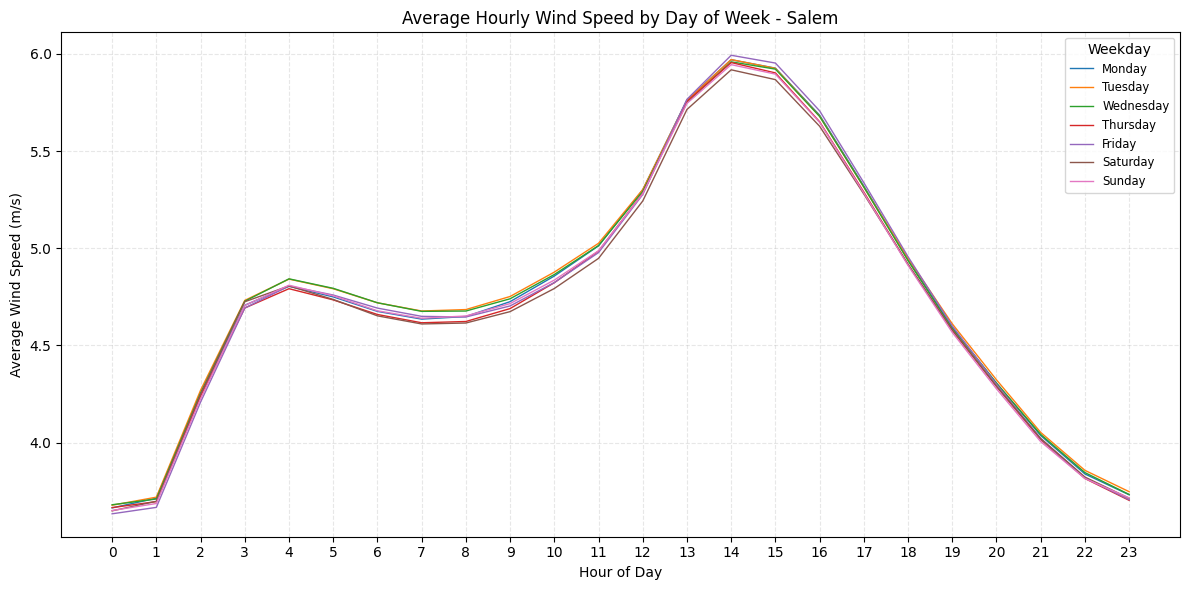

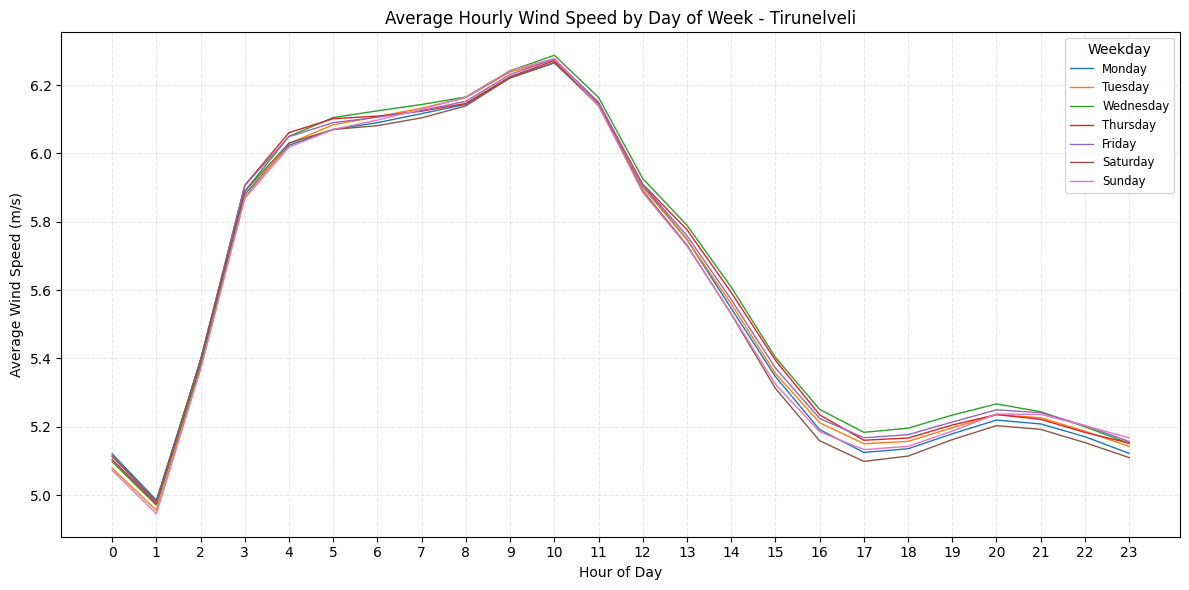

In [10]:
for city in cities:
    df = load_data(city)

    # Extract features
    df['weekday'] = df['date_time'].dt.day_name()   # Monday, Tuesday, ...
    df['hour'] = df['date_time'].dt.hour            # 0–23

    # Group and aggregate
    grouped = df.groupby(['weekday', 'hour'])['wind_speed'].mean().reset_index()

    # Weekday order
    weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    grouped['weekday'] = pd.Categorical(grouped['weekday'], categories=weekday_order, ordered=True)
    grouped = grouped.sort_values(['weekday', 'hour'])

    # Plotting
    plt.figure(figsize=(12, 6))
    for day in weekday_order:
        day_data = grouped[grouped['weekday'] == day]
        plt.plot(day_data['hour'], day_data['wind_speed'], label=day, linewidth=1)

    plt.title(f"Average Hourly Wind Speed by Day of Week - {city.split('.')[0].capitalize()}")
    plt.xlabel("Hour of Day")
    plt.ylabel("Average Wind Speed (m/s)")
    plt.xticks(range(0, 24))
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.legend(title="Weekday", loc='upper right', fontsize='small')
    plt.tight_layout()
    plt.show()
